In [1]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv('alturas-pesos-1-train.csv')

In [8]:
from collections import Counter
tuplas = []
for line in df[['Peso', 'Altura']].values:
    tuplas.append(tuple(line))
frecuencia_conjunta = dict(Counter(tuplas))
conjunta_prob = {al:c/len(df) for al, c in frecuencia_conjunta.items()}

In [13]:
frecuencia_conjunta[max(frecuencia_conjunta, key=frecuencia_conjunta.get)]

29

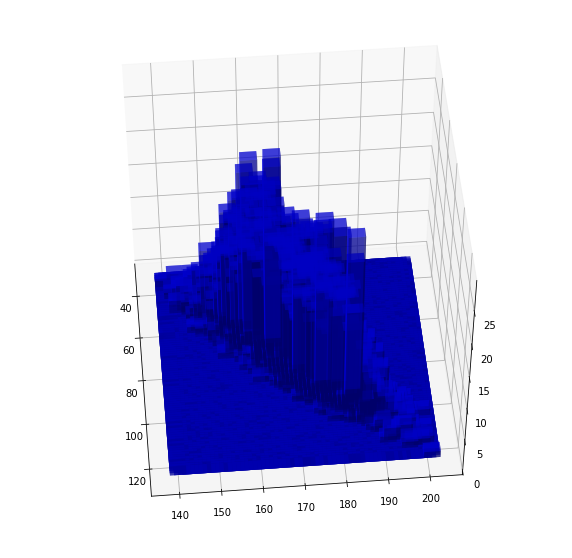

In [16]:
from helper import plot_joint_3d
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
conjunta_np = plot_joint_3d(frecuencia_conjunta, bins_width = 4, az=50, el=-5, ax=ax)

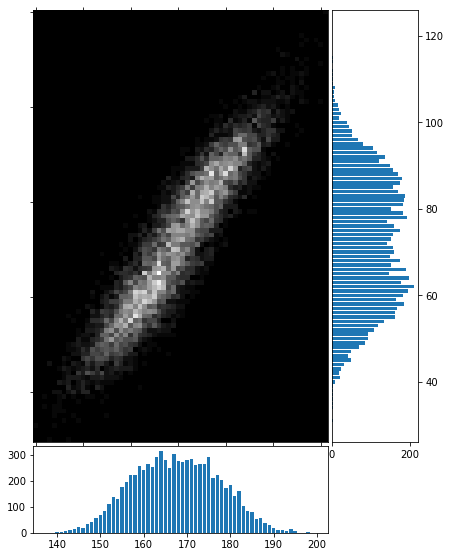

In [14]:
from helper import plot_joint_hists_dicts
conjunta_np, p_min, a_min = plot_joint_hists_dicts(frecuencia_conjunta)

# Armamos Conjunta Condicional por genero

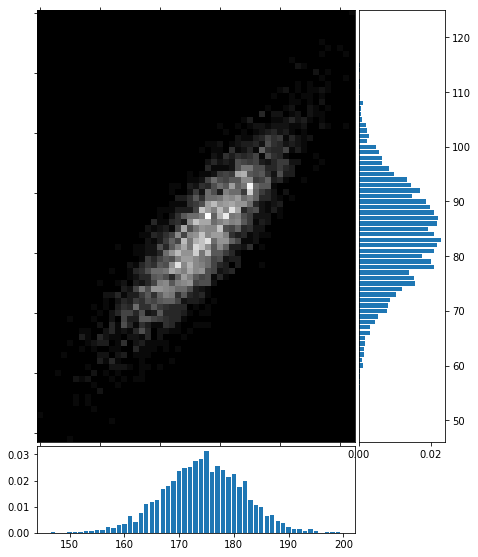

In [17]:
tuplas = []
for line in df[df['Genero']=='Hombre'][['Peso', 'Altura']].values:
    tuplas.append(tuple(line))
frecuencia_conjunta_hombre = dict(Counter(tuplas))
conjunta_prob_H = {al:c/len(df) for al, c in frecuencia_conjunta_hombre.items()}
conjunta_np, p_min, a_min = plot_joint_hists_dicts(conjunta_prob_H)

In [30]:
conj_array = np.array([[p,a] for p,a in conjunta_prob_H.keys()])
p_max, a_max = np.max(conj_array, axis=0)
p_min, a_min = np.min(conj_array, axis=0)
conjunta_H = np.zeros([p_max - p_min + 1, a_max-a_min + 1])
conjunta_H.shape

(72, 53)

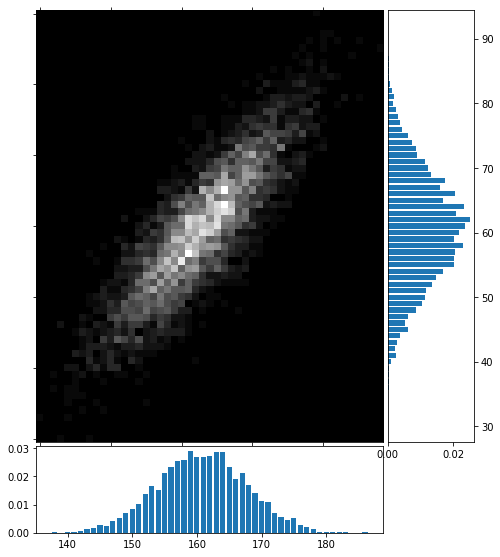

In [7]:
tuplas = []
for line in df[df['Genero']=='Mujer'][['Peso', 'Altura']].values:
    tuplas.append(tuple(line))
frecuencia_conjunta_mujer = dict(Counter(tuplas))
conjunta_prob_M = {al:c/len(df) for al, c in frecuencia_conjunta_mujer.items()}
_ = plot_joint_hists_dicts(conjunta_prob_M)

# Modelamos con Gaussiana bivariable

Con pandas

In [31]:
df[df['Genero']=='Hombre'][['Peso', 'Altura']].cov()

,Peso,Altura
Peso,80.787596,56.299412
Altura,56.299412,53.174570


In [32]:
df[df['Genero']=='Mujer'][['Peso', 'Altura']].cov()

,Peso,Altura
Peso,75.271662,50.747354
Altura,50.747354,47.723564


In [10]:
import numpy as np

Que tenemos que calcular?

In [33]:
pesos_alturas_H = df[df['Genero']=='Hombre'][['Peso', 'Altura']].values
pesos_alturas_M = df[df['Genero']=='Mujer'][['Peso', 'Altura']].values

In [35]:
mean_vector_H = pesos_alturas_H.mean(axis=0)
mean_vector_M = pesos_alturas_M.mean(axis=0)
print(mean_vector_H, mean_vector_M)

var_vector_H = pesos_alturas_H.var(axis=0)
var_vector_M = pesos_alturas_M.var(axis=0)
print(var_vector_H, var_vector_M)

[ 83.95577211 174.4177911 ] [ 60.63481741 160.80765383]
[80.76740921 53.16128268] [75.25283477 47.71162726]


In [37]:
cov_mat_H = np.cov(pesos_alturas_H.T)
cov_mat_M = np.cov(pesos_alturas_M.T)
print(cov_mat_H)
print(cov_mat_M)

[[80.78759602 56.2994124 ]
 [56.2994124  53.17456968]]
[[75.2716621  50.74735416]
 [50.74735416 47.72356412]]


In [38]:
from helper import plot_mv_gaussian

In [39]:
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

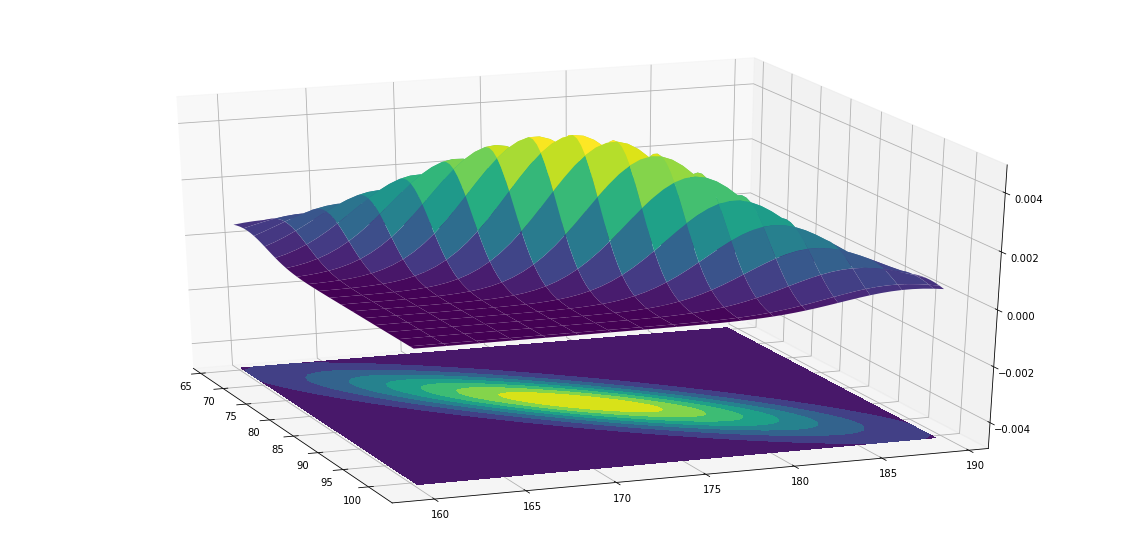

In [40]:
plot_mv_gaussian(mean_vector_H, cov_mat_H, N=50)

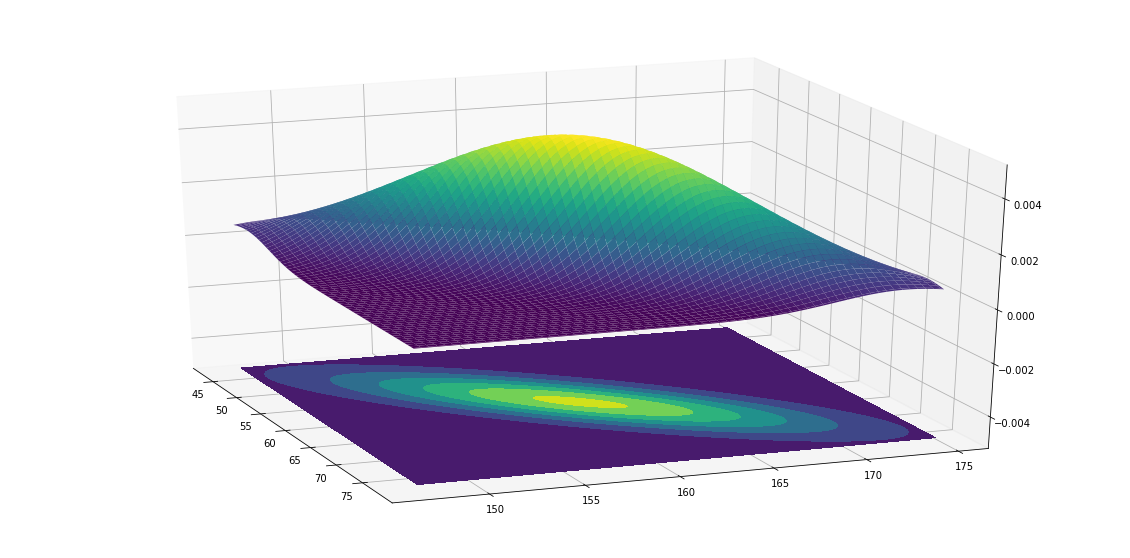

In [41]:
plot_mv_gaussian(mean_vector_M, cov_mat_M)

# Como modelo generador de pesos y alturas gaussianas

In [43]:
N_gen = 20
print(np.random.multivariate_normal(mean_vector_M, cov_mat_M, N_gen).astype(int))

[[ 70 165]
 [ 64 170]
 [ 57 145]
 [ 70 165]
 [ 59 162]
 [ 68 166]
 [ 65 156]
 [ 47 145]
 [ 72 168]
 [ 69 164]
 [ 51 148]
 [ 65 159]
 [ 52 151]
 [ 62 164]
 [ 67 173]
 [ 38 147]
 [ 58 161]
 [ 67 168]
 [ 67 169]
 [ 66 161]]
